# Seleccionando las variables de interés
Para el análisis de factores económicos de los datos del censo en el estado de Nuevo León (2010), procedemos a seleccionar las variables que nos permitirán replicar los indicadores económicos propuestos en el *Anexo C* del Consejo Nacional de Población (CONAPO),
con el fin de incorporar el índice de marginación en las distintas localidades de 
mayor población y de las cuales se tienen datos.

In [42]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt
from statistics import mean, stdev
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
#leemos los datos del censo en Nuevo León en el año 2010
censo_nl = pd.read_csv('censo_nl.csv')
#censo_nl = censo_nl.set_index('CVEGEO')
censo_nl.head()

,CVEGEO,NOMBRE,POB1,POB2,POB2_R,POB3,POB3_R,POB4,POB4_R,POB5,...,VIV37,VIV37_R,VIV38,VIV38_R,VIV39,VIV39_R,VIV40,VIV40_R,VIV41,VIV41_R
0,190010001,Abasolo,1976,107,5.4,176,8.9,101,5.1,228,...,5,1.0,77,15.3,383,76.0,5,1.0,-6,-6.0
1,190020001,Agualeguas,1995,80,4.0,140,7.0,92,4.6,190,...,10,1.5,103,15.4,520,77.7,8,1.2,5,0.7
2,190030001,Los Aldamas,545,19,3.5,31,5.7,17,3.1,42,...,3,1.6,20,10.5,164,85.9,3,1.6,0,0.0
3,190040001,Ciudad de Allende,26065,1408,5.4,2307,8.9,1383,5.3,3101,...,56,0.8,683,9.3,4621,63.1,30,0.4,15,0.2
4,190050001,An�huac,16628,902,5.4,1533,9.2,954,5.7,1988,...,52,1.2,731,17.2,3287,77.2,31,0.7,16,0.4


## Código geográfico y nombres

In [3]:
codigo_geo = list(censo_nl.loc[:,'CVEGEO'])
localidad = list(censo_nl.NOMBRE)

## Porcentaje de población de 15 años o más analfabeta

In [4]:
p_anal = np.array(censo_nl.EDU28) #población analfabeta de 15 años o más
p_anal[:5] 

array([ 36,  82,  33, 439, 417])

In [5]:
p_15 = np.array(censo_nl.POB20) #la población de 15 años o más
p_15[:5]

array([ 1352,  1534,   438, 18460, 10961])

## Porcentaje de población de 15 años o más sin primaria completa

In [6]:
p_15_se = np.array(censo_nl.EDU31)    #población de 15 años o más sin escolaridad,
p_15_pi = np.array(censo_nl.EDU34)    # población de 15 años o más con primaria incompleta
p_15_pc = np.array(censo_nl.EDU37)    # población de 15 años o más con primaria completa
p_15_si = np.array(censo_nl.ECO13)    # población de 15 años o más con secundaria incompleta
p_15_sc = np.array(censo_nl.ECO16)    # población de 15 años o más con secundaria completa 
p_15_pb = np.array(censo_nl.EDU40)    # población de 18 años o más con educación pos-básica

## Porcentaje de viviendas particulares habitadas sin excusado

In [7]:
viviendas_totales = np.array(censo_nl.HOGAR1)        # viviendas particulares habitadas totales 
viviendas_con_escusado = np.array(censo_nl.VIV19)    # viviendas particulares habitadas totales que disponen de excusado

## Porcentaje de viviendas particulares habitadas sin energía eléctrica

In [8]:
viviendas_sin_luz = np.array(censo_nl.VIV15)
viviendas_con_luz = np.array(censo_nl.VIV14)

## Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada

In [9]:
viviendas_entubadas = np.array(censo_nl.VIV16)
viviendas_no_entubadas = np.array(censo_nl.VIV17)
print(viviendas_entubadas[:5],viviendas_no_entubadas[:5])

[ 498  659  185 7168 4161] [-6  7  5 92 89]


## Promedio de ocupantes por cuarto en viviendas particulares habitadas

In [10]:
ocupantes_por_cuarto = np.array(censo_nl.VIV5_R)
i_6 = ocupantes_por_cuarto.copy()

## Porcentaje de viviendas particulares habitadas con piso de tierra

In [11]:
viviendas_tierra = np.array(censo_nl.VIV6_R) 
i_7 = viviendas_tierra

## Porcentaje de viviendas particulares habitadas que no disponen de refrigerador

In [12]:
viviendas_con_refri = np.array(censo_nl.VIV26) 

# Limpiando datos

**Recalculando un dataframe con las variables necesarias**

In [13]:
censo_nl_nuevo = pd.DataFrame({'codigo_geo':codigo_geo,'localidad':localidad,'p_anal':p_anal,
                              'p_15':p_15,'p_15_se':p_15_se,'p_15_pi':p_15_pi,'p_15_pc':p_15_pc,
                               'p_15_si':p_15_si,'p_15_sc':p_15_sc,'p_15_pb':p_15_pb,
                               'viviendas_totales':viviendas_totales,'viviendas_con_escusado':viviendas_con_escusado,
                               'viviendas_sin_luz':viviendas_sin_luz,'viviendas_con_luz':viviendas_con_luz,
                               'viviendas_entubadas':viviendas_entubadas,'viviendas_no_entubadas':viviendas_no_entubadas
                               ,'ocupantes_por_cuarto':ocupantes_por_cuarto,'viviendas_tierra':viviendas_tierra,
                               'viviendas_con_refri':viviendas_con_refri})
censo_nl_nuevo = censo_nl_nuevo.set_index('codigo_geo')
censo_nl_nuevo.head()

,localidad,p_anal,p_15,p_15_se,p_15_pi,p_15_pc,p_15_si,p_15_sc,p_15_pb,viviendas_totales,viviendas_con_escusado,viviendas_sin_luz,viviendas_con_luz,viviendas_entubadas,viviendas_no_entubadas,ocupantes_por_cuarto,viviendas_tierra,viviendas_con_refri
codigo_geo,,,,,,,,,,,,,,,,,,
190010001,Abasolo,36,1352,55,503,403,49,244,380,504,494,5,496,498,-6,1.0,-6.0,473
190020001,Agualeguas,82,1534,119,736,287,50,174,386,669,657,6,660,659,7,0.8,-6.0,646
190030001,Los Aldamas,33,438,34,261,85,3,43,57,191,185,0,191,185,5,0.7,-6.0,187
190040001,Ciudad de Allende,439,18460,502,7343,5056,468,3375,5440,7323,7218,9,7281,7168,92,0.9,1.5,7082
190050001,An�huac,417,10961,509,5039,2233,270,1293,3096,4256,4157,38,4213,4161,89,-6.0,3.1,3997


In [14]:
v_interes = ['codigo_geo', 'localidad', 'p_anal', 'p_15', 'p_15_se', 'p_15_pi', 'p_15_pc', 'p_15_si', 'p_15_sc', 'p_15_pb',
 'viviendas_totales', 'viviendas_con_escusado', 'viviendas_sin_luz', 'viviendas_con_luz', 'viviendas_entubadas',
 'viviendas_no_entubadas', 'ocupantes_por_cuarto', 'viviendas_tierra', 'viviendas_con_refri']

Notemos que los hay algunas filas que hacen imposible calcular los indicadores económicos necesarios para la obtención del índice de marginalidad. Por ejemplo, veamos la siguiente localidad (**La placeta**):

In [15]:
censo_nl_nuevo.loc[190010037]

localidad                 La Placeta
p_anal                            -6
p_15                              -6
p_15_se                           -6
p_15_pi                           -6
p_15_pc                           -6
p_15_si                           -6
p_15_sc                           -6
p_15_pb                           -6
viviendas_totales                 -6
viviendas_con_escusado            -6
viviendas_sin_luz                 -6
viviendas_con_luz                 -6
viviendas_entubadas               -6
viviendas_no_entubadas            -6
ocupantes_por_cuarto            -6.0
viviendas_tierra                -6.0
viviendas_con_refri               -6
Name: 190010037, dtype: object

Esto hace que tengamos que borrar estos datos, pues imputarlos, sería sesgar la información que verdaderamente
hacen relación a la localidad.

## Eliminación de datos no imputables

Se sabe que los datos negativos representan valores *NAN*, así, procedemos a identificarlos:

In [16]:
fila_negativa_6 = censo_nl_nuevo.iloc[:,1:].apply(mean, axis=1) == -6 #filas con -6 como entradas

In [17]:
indices_no_negativos_6 = np.where(fila_negativa_6 == False) #seleccionamos los índices que no son negativos
censo_nl_nuevo = censo_nl_nuevo.iloc[indices_no_negativos_6]
censo_nl_nuevo.shape

(2082, 18)

In [18]:
fila_negativa_9 = censo_nl_nuevo.iloc[:,1:].apply(mean, axis=1) == -9 #filas con -9 como entradas
indices_no_negativos_9 = np.where(fila_negativa_9 == False) #seleccionamos los índices que no son negativos
censo_nl_nuevo = censo_nl_nuevo.iloc[indices_no_negativos_9]
censo_nl_nuevo

,localidad,p_anal,p_15,p_15_se,p_15_pi,p_15_pc,p_15_si,p_15_sc,p_15_pb,viviendas_totales,viviendas_con_escusado,viviendas_sin_luz,viviendas_con_luz,viviendas_entubadas,viviendas_no_entubadas,ocupantes_por_cuarto,viviendas_tierra,viviendas_con_refri
codigo_geo,,,,,,,,,,,,,,,,,,
190010001,Abasolo,36,1352,55,503,403,49,244,380,504,494,5,496,498,-6,1.0,-6.0,473
190020001,Agualeguas,82,1534,119,736,287,50,174,386,669,657,6,660,659,7,0.8,-6.0,646
190030001,Los Aldamas,33,438,34,261,85,3,43,57,191,185,0,191,185,5,0.7,-6.0,187
190040001,Ciudad de Allende,439,18460,502,7343,5056,468,3375,5440,7323,7218,9,7281,7168,92,0.9,1.5,7082
190050001,An�huac,417,10961,509,5039,2233,270,1293,3096,4256,4157,38,4213,4161,89,-6.0,3.1,3997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190510017,El Potrero,20,481,21,264,121,4,57,73,223,218,-6,219,218,5,0.8,-6.0,214
190510020,El Salto,-6,13,-6,10,-6,-6,-6,0,5,5,0,5,5,0,0.9,-6.0,5
190510022,Hacienda Santa Fe,3,118,4,63,24,-6,14,26,52,50,-6,51,49,3,0.8,-6.0,51


## Imputando datos
Usamos la clase `KNNImputer` ofrecido por el módulo `imputer` de la librería `sklearn`, el cual nos ayudará a
imputar los datos vía 7 vecinos más cercanos:

In [19]:
imputer_6 = KNNImputer(missing_values=-6, n_neighbors=7) #imputador de valores -6
imputer_9 = KNNImputer(missing_values=-9, n_neighbors=7) #imputador de valores -6
censo_nl_nuevo.iloc[:,1:] = imputer_6.fit_transform(censo_nl_nuevo.iloc[:,1:])
censo_nl_nuevo.iloc[:,1:] = imputer_9.fit_transform(censo_nl_nuevo.iloc[:,1:])
censo_nl_nuevo

,localidad,p_anal,p_15,p_15_se,p_15_pi,p_15_pc,p_15_si,p_15_sc,p_15_pb,viviendas_totales,viviendas_con_escusado,viviendas_sin_luz,viviendas_con_luz,viviendas_entubadas,viviendas_no_entubadas,ocupantes_por_cuarto,viviendas_tierra,viviendas_con_refri
codigo_geo,,,,,,,,,,,,,,,,,,
190010001,Abasolo,36.000000,1352.0,55.000000,503.0,403.000000,49.000000,244.000000,380.000000,504.0,494.0,5.000000,496.0,498.0,25.142857,1.000000,2.757143,473.0
190020001,Agualeguas,82.000000,1534.0,119.000000,736.0,287.000000,50.000000,174.000000,386.000000,669.0,657.0,6.000000,660.0,659.0,7.000000,0.800000,3.242857,646.0
190030001,Los Aldamas,33.000000,438.0,34.000000,261.0,85.000000,3.000000,43.000000,57.000000,191.0,185.0,0.000000,191.0,185.0,5.000000,0.700000,2.100000,187.0
190040001,Ciudad de Allende,439.000000,18460.0,502.000000,7343.0,5056.000000,468.000000,3375.000000,5440.000000,7323.0,7218.0,9.000000,7281.0,7168.0,92.000000,0.900000,1.500000,7082.0
190050001,An�huac,417.000000,10961.0,509.000000,5039.0,2233.000000,270.000000,1293.000000,3096.000000,4256.0,4157.0,38.000000,4213.0,4161.0,89.000000,1.085714,3.100000,3997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190510017,El Potrero,20.000000,481.0,21.000000,264.0,121.000000,4.000000,57.000000,73.000000,223.0,218.0,1.142857,219.0,218.0,5.000000,0.800000,2.457143,214.0
190510020,El Salto,1.285714,13.0,0.857143,10.0,1.000000,0.000000,0.571429,0.000000,5.0,5.0,0.000000,5.0,5.0,0.000000,0.900000,0.000000,5.0
190510022,Hacienda Santa Fe,3.000000,118.0,4.000000,63.0,24.000000,3.571429,14.000000,26.000000,52.0,50.0,0.000000,51.0,49.0,3.000000,0.800000,3.285714,51.0


# Calculando los indicadores económicos

## Calculamos el porcentajede población de 15 años o más analfabeta:

In [20]:
i_1 = (censo_nl_nuevo.p_anal / censo_nl_nuevo.p_15)*100 #indicador 1
i_1[0:5]

codigo_geo
190010001    2.662722
190020001    5.345502
190030001    7.534247
190040001    2.378115
190050001    3.804397
dtype: float64

## Creamos el porcentaje de población de 15 años o más sin primaria completa:

In [21]:
i_2 = ((censo_nl_nuevo.p_15_se + censo_nl_nuevo.p_15_pi)/(censo_nl_nuevo.p_15_se+censo_nl_nuevo.p_15_pi+ #indicador 2
                                                          censo_nl_nuevo.p_15_pc+censo_nl_nuevo.p_15_si
                                                          +censo_nl_nuevo.p_15_sc+censo_nl_nuevo.p_15_pb))*100 
i_2[:5]

codigo_geo
190010001    34.149327
190020001    48.801370
190030001    61.076605
190040001    35.363325
190050001    44.598071
dtype: float64

## Calculamos el porcentaje de viviendas particulares habitadas sin excusado:

In [22]:
i_3 = 100*(censo_nl_nuevo.viviendas_totales-censo_nl_nuevo.viviendas_con_escusado)/censo_nl_nuevo.viviendas_totales
i_3[:5]

codigo_geo
190010001    1.984127
190020001    1.793722
190030001    3.141361
190040001    1.433839
190050001    2.326128
dtype: float64

## Calculamos el porcentaje de viviendas particulares habitadas sin energía eléctrica

In [23]:
i_4 = 100*censo_nl_nuevo.viviendas_sin_luz/(censo_nl_nuevo.viviendas_con_luz+censo_nl_nuevo.viviendas_sin_luz) 
i_4 #indicador 4

codigo_geo
190010001    0.998004
190020001    0.900901
190030001    0.000000
190040001    0.123457
190050001    0.893907
               ...   
190510017    0.519143
190510020    0.000000
190510022    0.000000
190510023    0.000000
190510055    0.000000
Length: 2004, dtype: float64

## Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada

In [24]:
i_5 = censo_nl_nuevo.viviendas_no_entubadas/(censo_nl_nuevo.viviendas_entubadas+
                                             censo_nl_nuevo.viviendas_no_entubadas)
i_5[:5]

codigo_geo
190010001    0.048061
190020001    0.010511
190030001    0.026316
190040001    0.012672
190050001    0.020941
dtype: float64

## Promedio de ocupantes por cuarto en viviendas particulares habitadas

In [25]:
i_6 = censo_nl_nuevo.ocupantes_por_cuarto.copy()

## Porcentaje de viviendas particulares habitadas con piso de tierra

In [26]:
i_7 = censo_nl_nuevo.viviendas_tierra

## Porcentaje de viviendas particulares habitadas que no disponen de refrigerador

In [27]:
i_8 = 100*(censo_nl_nuevo.viviendas_totales-censo_nl_nuevo.viviendas_con_refri)/censo_nl_nuevo.viviendas_totales
i_8[:5]

codigo_geo
190010001    6.150794
190020001    3.437967
190030001    2.094241
190040001    3.291001
190050001    6.085526
dtype: float64

## Agrupando los indicadores

In [28]:
X = pd.DataFrame({'i_1':i_1,
                          'i_2':i_2,
                          'i_3':i_3,
                          'i_4':i_4,
                          'i_5':i_5,
                          'i_6':i_6,
                          'i_7':i_7,
                          'i_8':i_8})
X.head()

,i_1,i_2,i_3,i_4,i_5,i_6,i_7,i_8
codigo_geo,,,,,,,,
190010001,2.662722,34.149327,1.984127,0.998004,0.048061,1.000000,2.757143,6.150794
190020001,5.345502,48.801370,1.793722,0.900901,0.010511,0.800000,3.242857,3.437967
190030001,7.534247,61.076605,3.141361,0.000000,0.026316,0.700000,2.100000,2.094241
190040001,2.378115,35.363325,1.433839,0.123457,0.012672,0.900000,1.500000,3.291001
190050001,3.804397,44.598071,2.326128,0.893907,0.020941,1.085714,3.100000,6.085526


# Aplicando el método de *componentes principales* para estimar el *índice de marginación*:

## Estandarizamos los indicadores:

In [29]:
scaler = StandardScaler()

In [30]:
Z = scaler.fit_transform(X)
Z = pd.DataFrame(Z)
Z

,0,1,2,3,4,5,6,7
0,-0.629323,-1.399548,-0.386389,-0.295819,-0.973236,-0.505382,-0.335529,-0.584927
1,-0.346882,-0.687005,-0.399262,-0.300325,-1.067867,-0.928623,-0.306381,-0.676055
2,-0.116453,-0.090047,-0.308150,-0.342130,-1.028036,-1.140243,-0.374964,-0.721192
3,-0.659286,-1.340510,-0.423593,-0.336401,-1.062420,-0.717002,-0.410970,-0.680991
4,-0.509128,-0.891415,-0.363267,-0.300650,-1.041581,-0.323993,-0.314954,-0.587120
...,...,...,...,...,...,...,...,...
1999,-0.471901,-0.493628,-0.368944,-0.318040,-1.037850,-0.928623,-0.353532,-0.655970
2000,0.131570,1.187962,-0.520534,-0.342130,-1.094355,-0.717002,-0.500985,-0.791541
2001,-0.641993,-0.639039,-0.260499,-0.342130,-0.948964,-0.928623,-0.303809,-0.726942
2002,-0.412270,-1.318749,-0.397608,-0.342130,-1.094355,-0.717002,-0.500985,-0.730465


In [31]:
corr = Z.corr() 
vals, vecs = np.linalg.eig(corr)
# la descomposicion hecha con el modulo de algebra lineal de numpy no da los eigenvalores ordenados,
# entonces, los ordenamos de forma descendente
idx = vals.argsort()[::-1]
eigvals = vals[idx]
eigvecs = vecs[:,idx]

In [32]:
dat = {'componente':range(1,9),'sd':np.sqrt(eigvals), 'proporcion_varianza':eigvals/sum(eigvals), 
       'varianza_acumulada':np.cumsum(eigvals/sum(eigvals))}
stds = pd.DataFrame(dat)
stds

,componente,sd,proporcion_varianza,varianza_acumulada
0,1,1.722149,0.370725,0.370725
1,2,1.029644,0.132521,0.503246
2,3,0.969104,0.117395,0.620641
3,4,0.931698,0.108508,0.729148
4,5,0.856052,0.091603,0.820751
5,6,0.787927,0.077604,0.898355
6,7,0.758669,0.071947,0.970302
7,8,0.487423,0.029698,1.000000


Text(0.5, 1.0, 'Gráfica de codo')

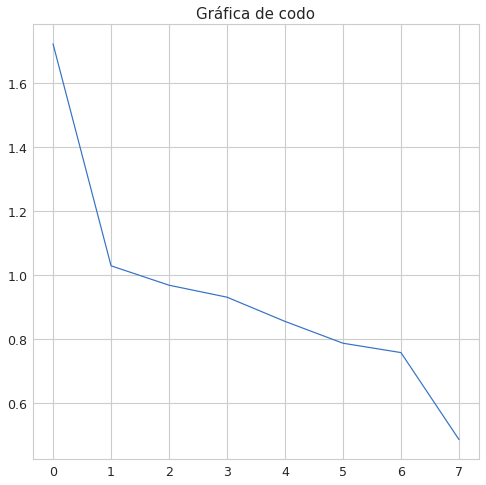

In [33]:
plt.figure(figsize=(8, 8))
plt.plot(np.sqrt(eigvals))
plt.title('Gráfica de codo', fontsize=15)

**Tomando la primer componente (por ser el de mayor varianza), mostramos las variables que más 
afectan al índice de marginación**

In [34]:
info_comp1 = pd.DataFrame({'coef_comp1':eigvecs[0],'ponderador_de_lectura':eigvecs[0]*eigvals[0]}, 
                          index= ['pob_15_analf','pob_15_sin_primaria','viviendas_sin_excusado', 
                                 'viviendas_sin_energia','viv_sin_agua_entubada','ocupantes_por_cuarto',
                                 'viv_con_piso_de_tierra','viv_sin_refri'])
info_comp1

,coef_comp1,ponderador_de_lectura
pob_15_analf,0.288062,0.854333
pob_15_sin_primaria,-0.212710,-0.630853
viviendas_sin_excusado,-0.658618,-1.953327
viviendas_sin_energia,-0.166441,-0.493631
viv_sin_agua_entubada,-0.498474,-1.478374
ocupantes_por_cuarto,-0.027445,-0.081395
viv_con_piso_de_tierra,0.398494,1.181853
viv_sin_refri,0.047613,0.141209


## Proyectamos sobre la primera componente:

In [59]:
proy = np.dot(Z,eigvecs[0])
proy[:5]
proy_procentaje = 100*(proy-np.min(proy))/(np.max(proy)-np.min(proy))#normalizamos


99.99999999999999